# Задание 1.2.3

Создайте класс по работе с тригонометрическими функциями. В классе
должны быть реализованы функции вычисления:

− косинуса;

− синуса;

− тангенса;

− арксинуса;

− арккосинуса;

− арктангенса;

− перевода из градусов в радианы.

In [11]:
import math

class Trigonometry:

    @staticmethod
    def sin(n):
        return math.sin(n)

    @staticmethod
    def cos(n):
        return math.cos(n)

    @staticmethod
    def tan(n):
        return math.tan(n)

    @staticmethod
    def asin(n):
        return math.asin(n)

    @staticmethod
    def acos(n):
        return math.acos(n)

    @staticmethod
    def atan(n):
        return math.atan(n)

    @staticmethod
    def rad(n):
        return math.radians(n)

    print(cos(math.pi))
    print(sin(0))
    print(tan(0))
    print(asin(1))
    print(acos(1))
    print(atan(math.pi))
    print(rad(90))

-1.0
0.0
0.0
1.5707963267948966
0.0
1.2626272556789118
1.5707963267948966


# Задание 1.2.2


Дан класс, описывающий бинарное дерево.
Реализуйте в классе функцию для вставки нового элемента в дерево по
следующим правилам:

• Левое поддерево узла содержит только узлы со значениями меньше,
чем значение в узле.

• Правое поддерево узла содержит только узлы со значениями меньше,
чем значение в узле.

• Каждое из левого и правого поддеревьев также должно быть
бинарным деревом поиска.

• Не должно быть повторяющихся узлов.

Метод вставки сравнивает значение узла с родительским узлом и решает
куда доваить элемент (в левое или правое поддерево). Перепишите, метод
PrintTree для печати полной версии дерева.


In [14]:
class Tree:
    def __init__(self, data):
        self.left = None
        self.right = None
        self.data = data

    def PrintTree(self):
        if self.left:
            self.left.PrintTree()
        print(self.data)
        if self.right:
            self.right.PrintTree()

    def new(self, n):
        if n < self.data:
            if self.left:
                self.left.new(n)
            else:
                self.left = Tree(n)
        if n > self.data:
            if self.right:
                self.right.new(n)
            else:
                self.right = Tree(n)

a = Tree(8)
a.new(4)
a.new(1)
a.new(6)
a.new(12)
a.PrintTree()

1
4
6
8
12


# Задание 1.3.1

Постройте классификатор на основе дерева принятия решений
следующего датасета:

[[10  0  0]
 [ 0 10  1]
 [ 0  2  7]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.83      0.91      0.87        11
   virginica       0.88      0.78      0.82         9

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



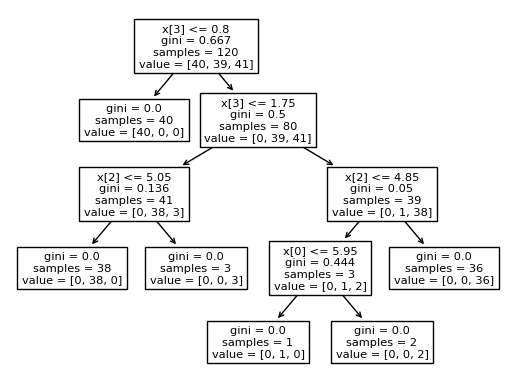

In [15]:
import numpy as np
import seaborn as sns

dataset = sns.load_dataset('iris')
dataset
dataset.shape
dataset.head()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(

    dataset.iloc[:, :-1],
    dataset.iloc[:, -1],
    test_size = 0.20
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape
X_train.head()
y_train.head()

from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

from sklearn import tree
tree.plot_tree(classifier)

y_pred = classifier.predict(X_test)
y_pred

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
target = [0, 0, 0, 1, 1, 1]

# Задание 1.4.1

Постройте модель регрессии для данных из предыдущей рабочей
тетради.Для примера можно взять потребления газа (в миллионах
галлонов) в 48 штатах США или набор данных о качестве красного вина:
https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv
https://raw.githubusercontent.com/aniruddhachoudhury/Red-WineQuality/master/winequality-red.csv

Постройте прогноз. Оцените точность модели.

(48, 5)
Mean Squared Error: 15764.0
Mean Absolute Error: 92.8


2.187733291422734

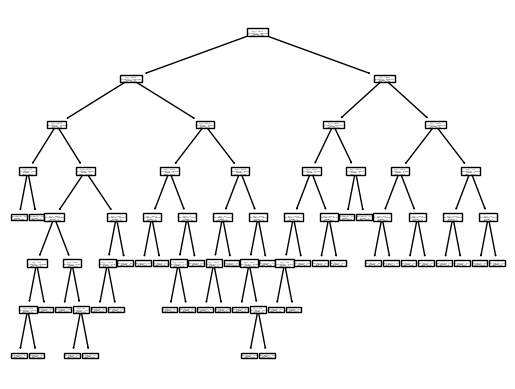

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = r'https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv'
dataset = pd.read_csv(url)
dataset.head()

print(dataset.shape)
dataset.describe()

from sklearn.tree import DecisionTreeRegressor
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 0)

regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

from sklearn import tree
tree.plot_tree(regressor)

y_pred = regressor.predict(X_test)

df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})

from sklearn import metrics
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

metrics.mean_absolute_error(y_test, y_pred) / np.average(y) * 100